# Student Performance Predictor

## Life Cycle of Project:
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks
4. Exploratory Data Analysis (EDA)
5. Data Pre-Processing
6. Model Training
7. Model Deployment

## 1. Understanding the Problem Statement
1.  This Project focuses on how the student performance gets affected due to different features such as Gender, Ethnicity, Parental Level of Education etc.

## 2. Data Collection
1.  Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
2. It consists of 1000 rows and 8 columns.

## 2.1 Import Data and Required Libraries/Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [4]:
df=pd.read_csv('data/stud.csv')

### Show the data 

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [6]:
df.shape

(1000, 8)

## 2.2 Dataset Columns Info

1. gender:sex of students->(Male or Female)
2. race/ethnicity: ethnicity of students-> (Group A,B,C,D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

## 3. Data Checks

1. Check missing values
2. Check duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

## 3.1 Check missing values

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the dataset

## 3.2 Check duplicates

###

In [8]:
df.duplicated().sum()

0

### There are no duplicate values in the dataset

## 3.3 Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observation-
1. Minimum value of math score is 0,reading score is 17 and writing score is 10.
2. Maximum value of all scores is 100.
3. All the mean values and standard values are very close to each other.

## 3.6 Check various categories present in the different categorical column

In [12]:
categorical_columns=[feature for feature in df.columns if df[feature].dtypes=='O']
for col in categorical_columns:
    print('Number of categories in {}: {}'.format(col,df[col].nunique()))
    print('Categories in {}: {}'.format(col,df[col].unique()))
    print(" ")

Number of categories in gender: 2
Categories in gender: ['female' 'male']
 
Number of categories in race_ethnicity: 5
Categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
 
Number of categories in parental_level_of_education: 6
Categories in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
Number of categories in lunch: 2
Categories in lunch: ['standard' 'free/reduced']
 
Number of categories in test_preparation_course: 2
Categories in test_preparation_course: ['none' 'completed']
 


## 3.7 Store numerical columns seperately

In [13]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Numerical columns are {}'.format(numerical_columns))

Numerical columns are ['math_score', 'reading_score', 'writing_score']


## 3.8 Adding columns for 'Total Score' and 'Average'

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=np.round(df['total_score']/3,2)

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


## 4 Exploratory Data Analysis

## 4.1 Performances in each subject

In [16]:
for col in numerical_columns:
    print('Number of students with {} less than 50: {}'.format(col,df[df[col]<=50].shape[0]))
    print('Number of students with {} more than 80: {}'.format(col,df[df[col]>=80].shape[0]))
    print(' ')

Number of students with math_score less than 50: 150
Number of students with math_score more than 80: 193
 
Number of students with reading_score less than 50: 97
Number of students with reading_score more than 80: 249
 
Number of students with writing_score less than 50: 124
Number of students with writing_score more than 80: 235
 


### Observations:
 The order of performance from worst to best has in all 3 subjects has been : Math->Writing->Reading

## 4.2 Average Score Distrbution and Total Score Distribution

Histogram and KDE Distribution on distribution of gender

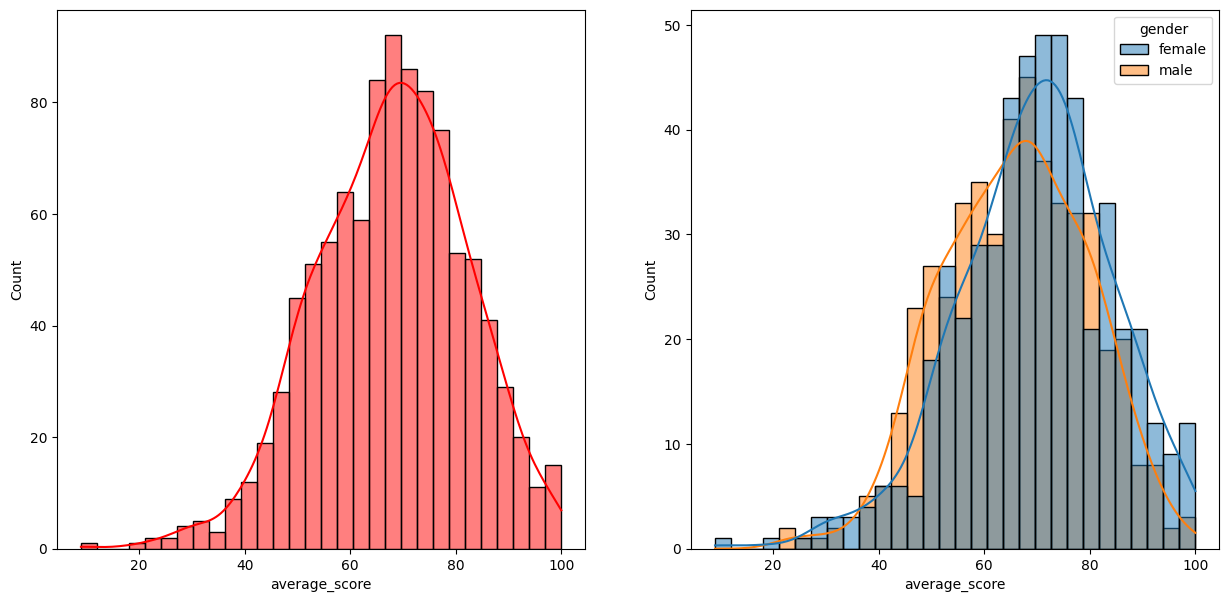

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')
plt.show()

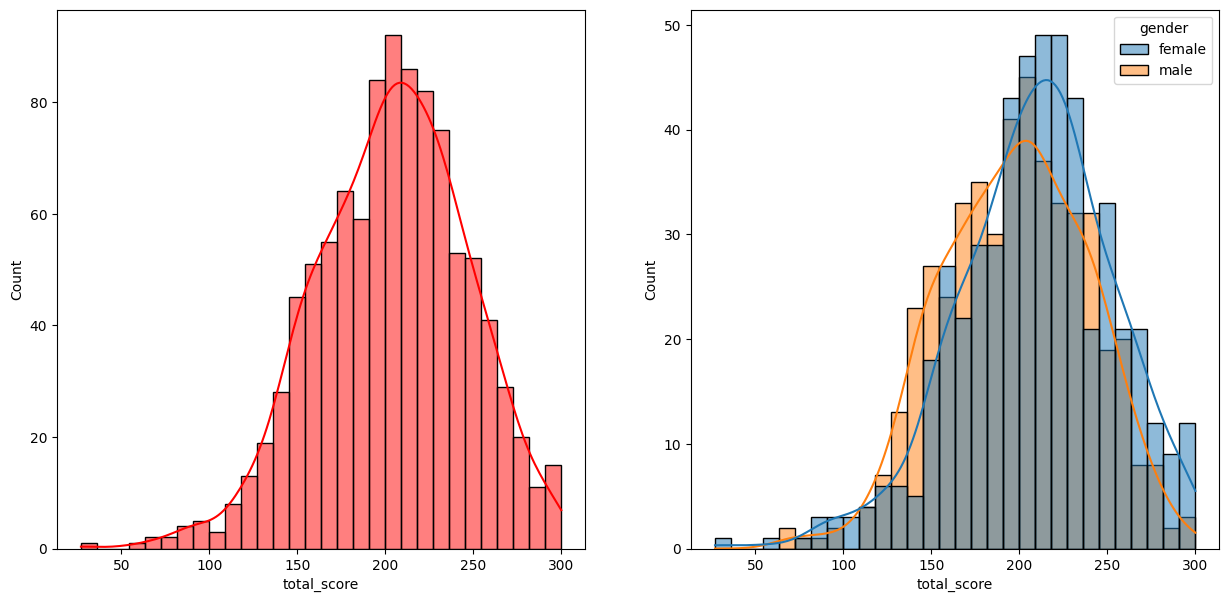

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

### Observations:
Females have better performance than males 

## 4.3 Average Score Distrbution and Total Score Distribution

Histogram and KDE Distribution on distribution of lunch 

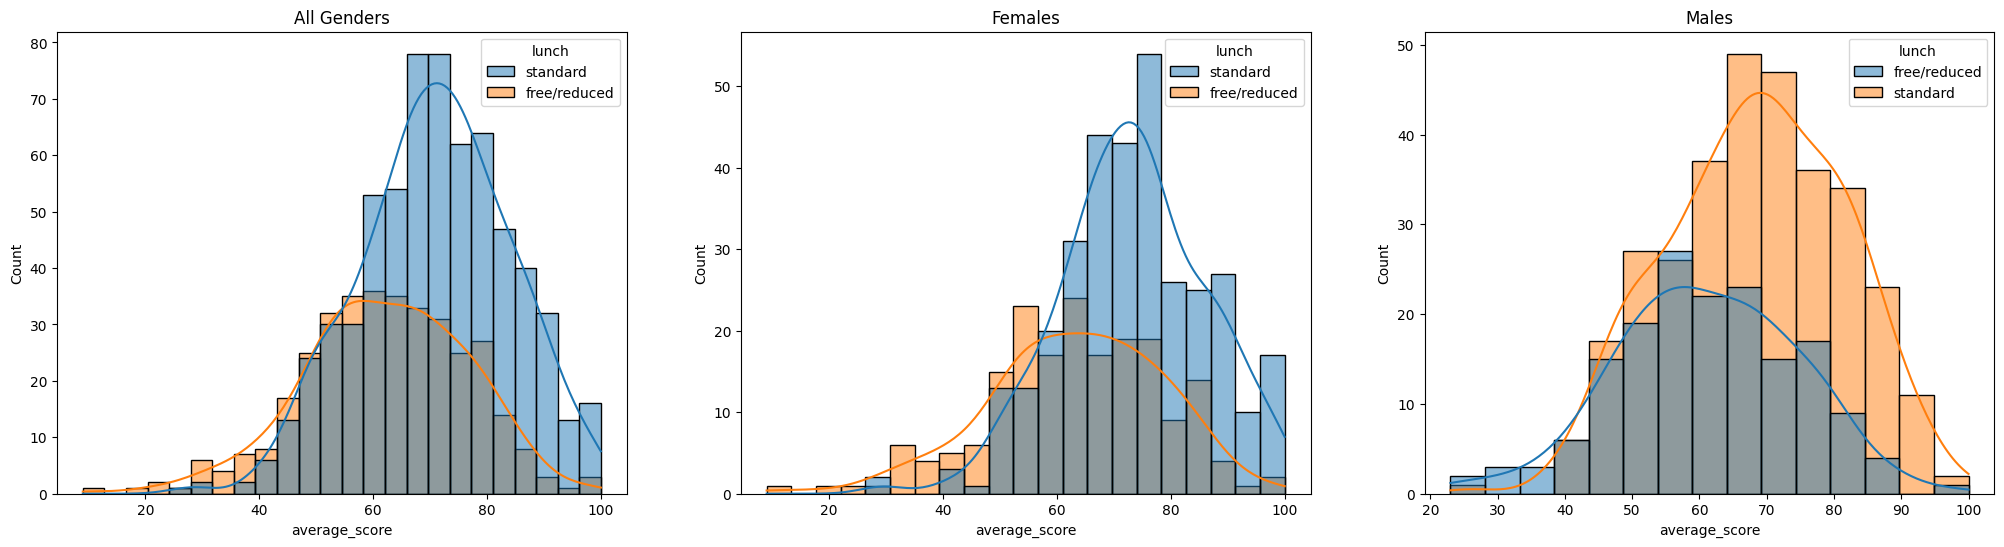

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(25, 6))


sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('All Genders')


sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Males')

plt.show()

### Observations:
Students with standard lunches perform welll in both cases-> male and female

## 4.4 Average Score Distrbution and Total Score Distribution

Histogram and KDE Distribution on distribution of parental level of education 

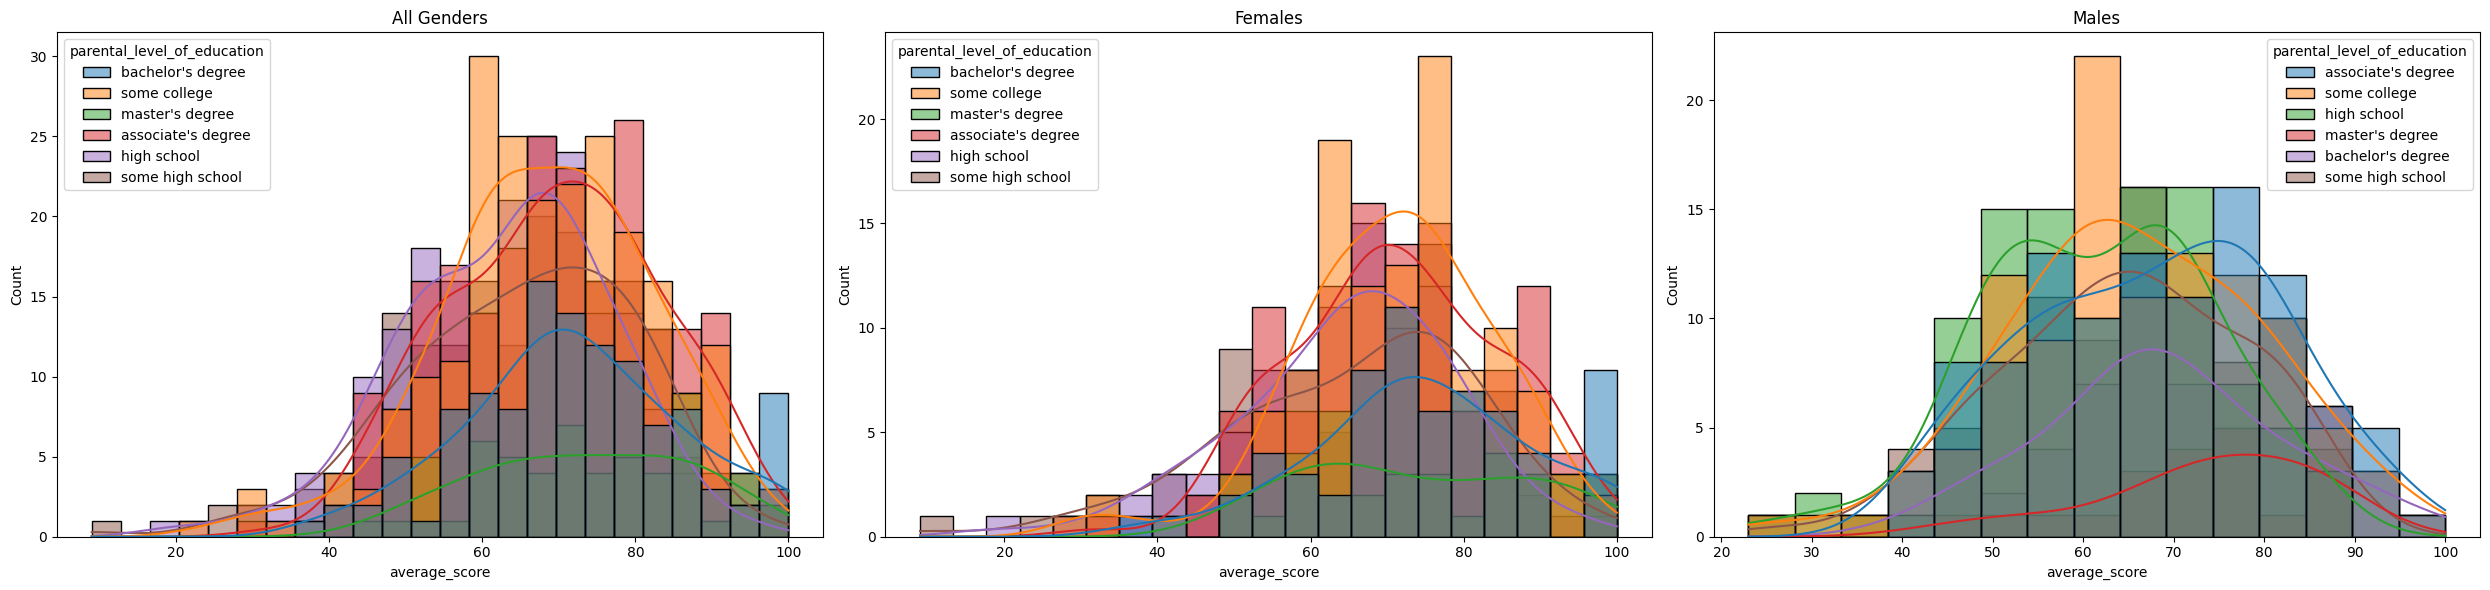

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()

### Observations:
1. In case of males better performance is achieved when parental level of education is associate's degree or master's degree
2. It does not affect performace in case of females.
3. In general parental level of education does not contribute in better performance as such.

## 4.5 Average Score Distrbution and Total Score Distribution

Histogram and KDE Distribution on distribution of race/ethnicity 

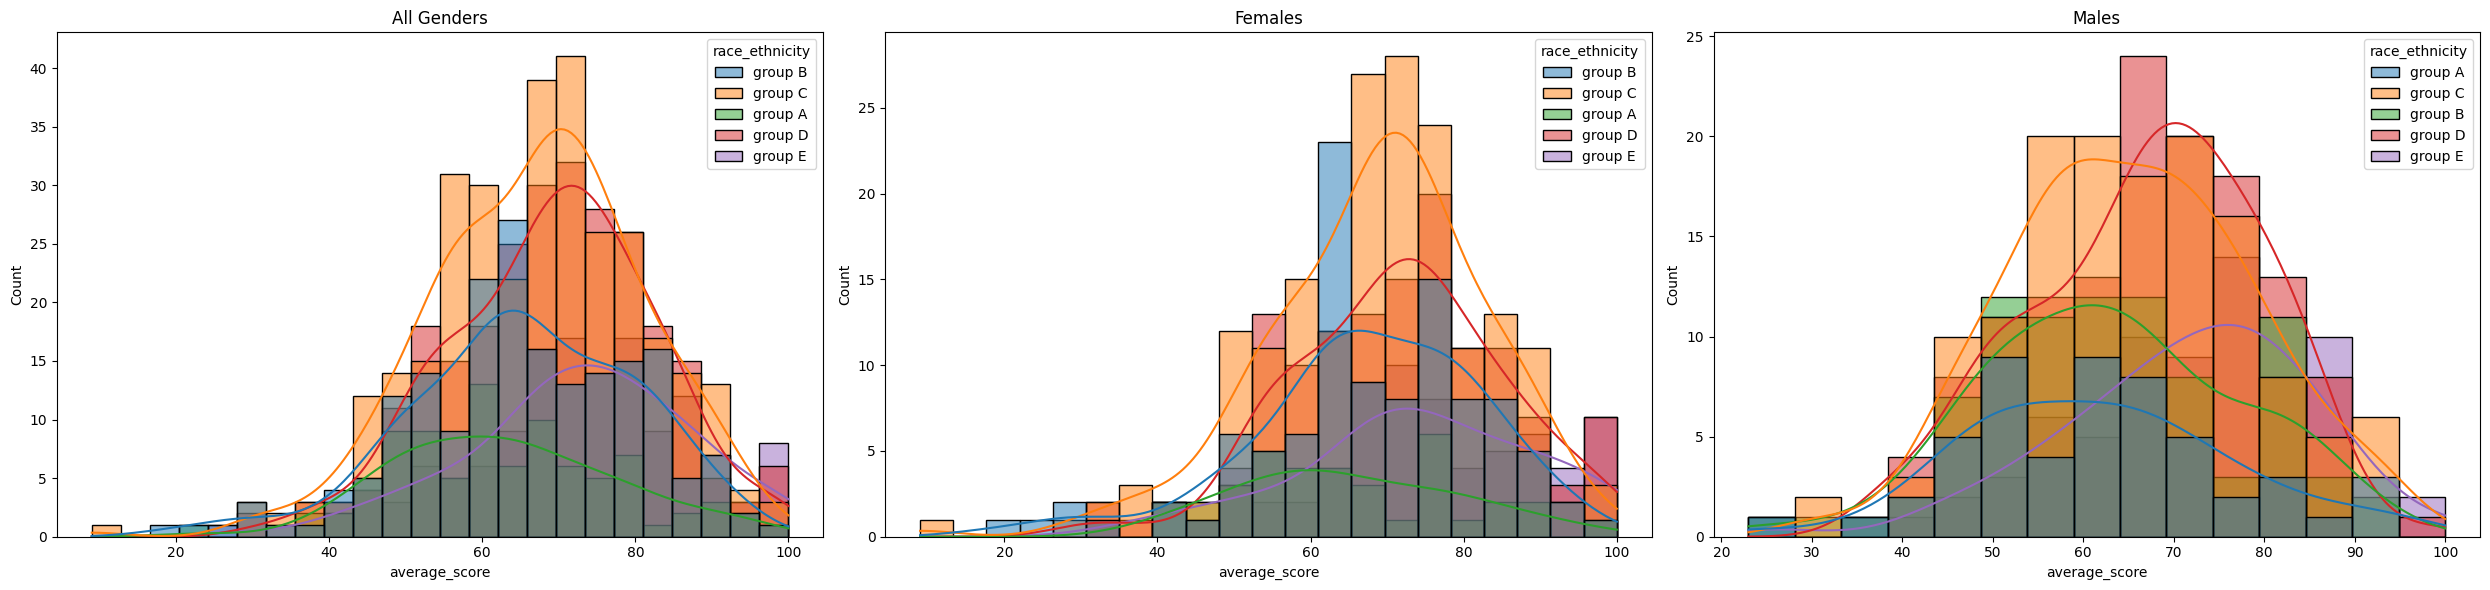

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()


### Observations:
1. In general Group A and Group B are not performing well and specially in males.
2. In case of females the effect is not that clear.
3. In case of males Group D and Group E are doing better.

## 4.6 Average Score Distrbution and Total Score Distribution

Histogram and KDE Distribution on distribution of  test preparation

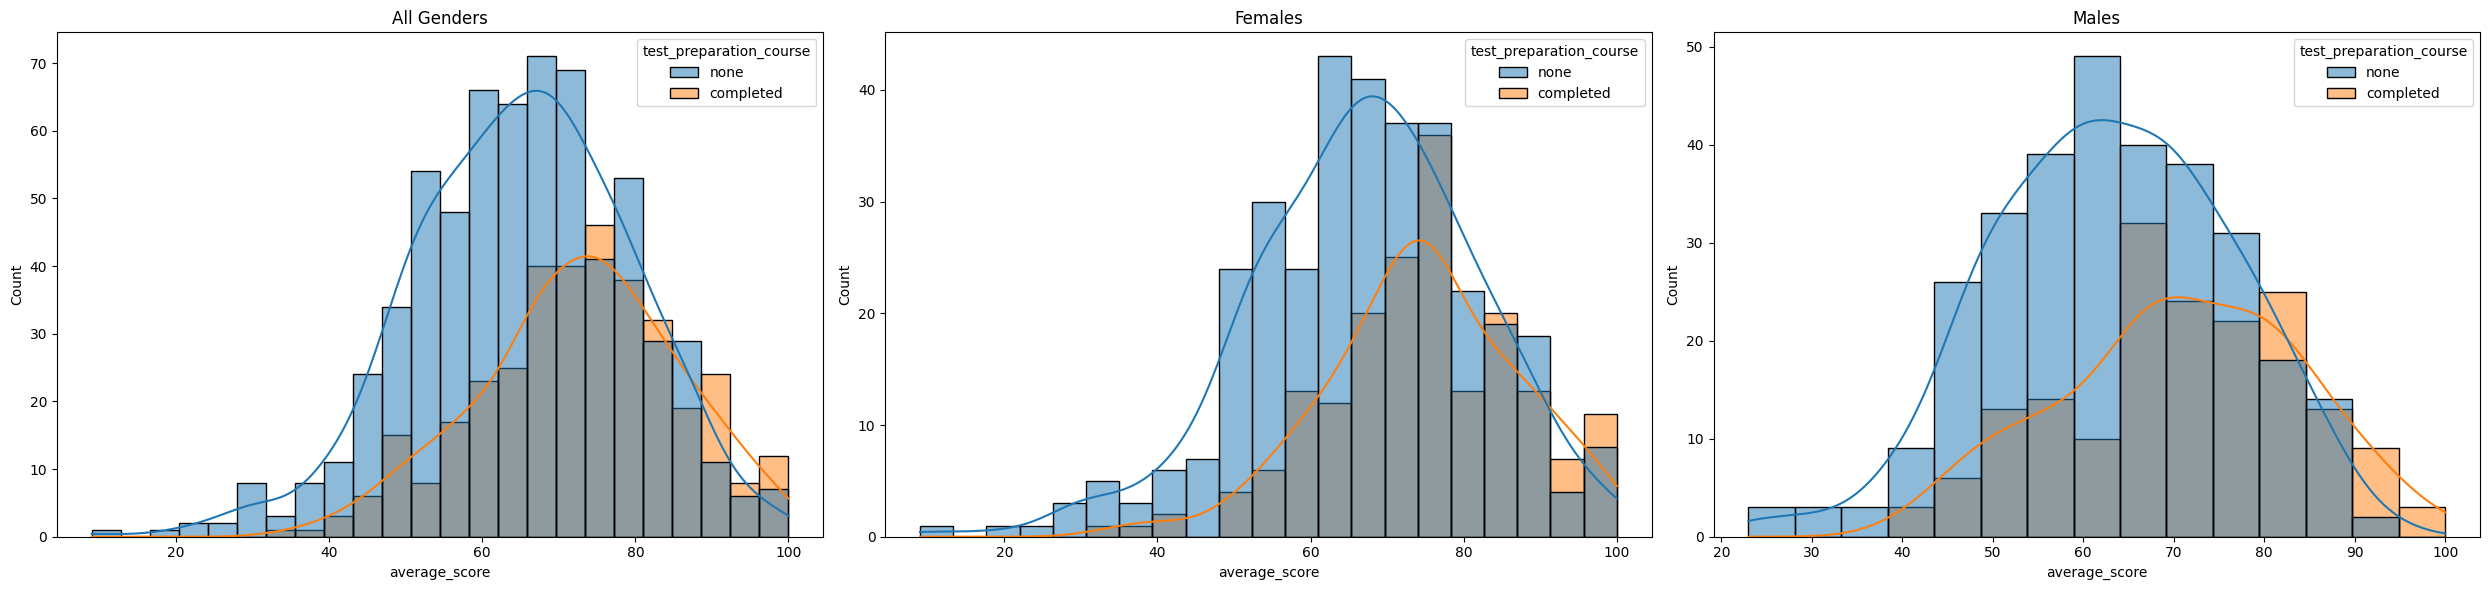

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='test_preparation_course', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='test_preparation_course', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='test_preparation_course', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()


### Observations:

In general student with completed preparation scored more marks.

## 4.7 Box Plot of Score for Different Subjects

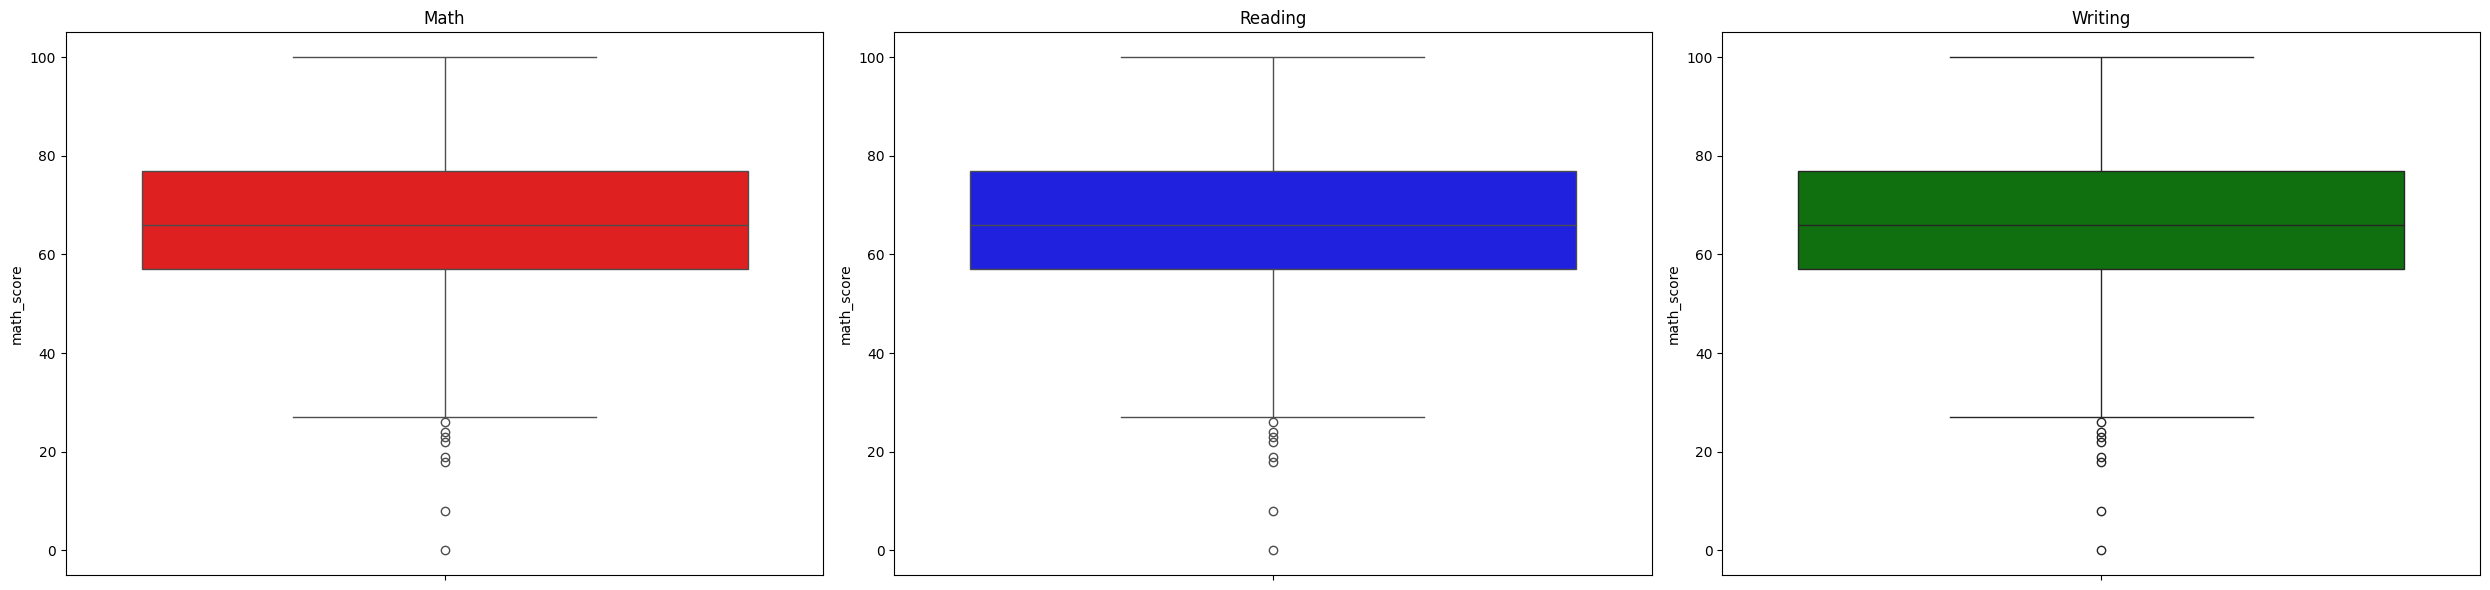

In [23]:
fig,axes=plt.subplots(1,3,figsize=(25,6))

sns.boxplot(data=df,y='math_score',ax=axes[0],color='r')
axes[0].set_title('Math')

sns.boxplot(data=df,y='math_score',ax=axes[1],color='b')
axes[1].set_title('Reading')

sns.boxplot(data=df,y='math_score',ax=axes[2],color='g')
axes[2].set_title('Writing')

plt.tight_layout()
plt.show()

### Observations:
In each case most of the marks lie in the range of 60-80

## 4.8 Pieplot for Distribution in different categories

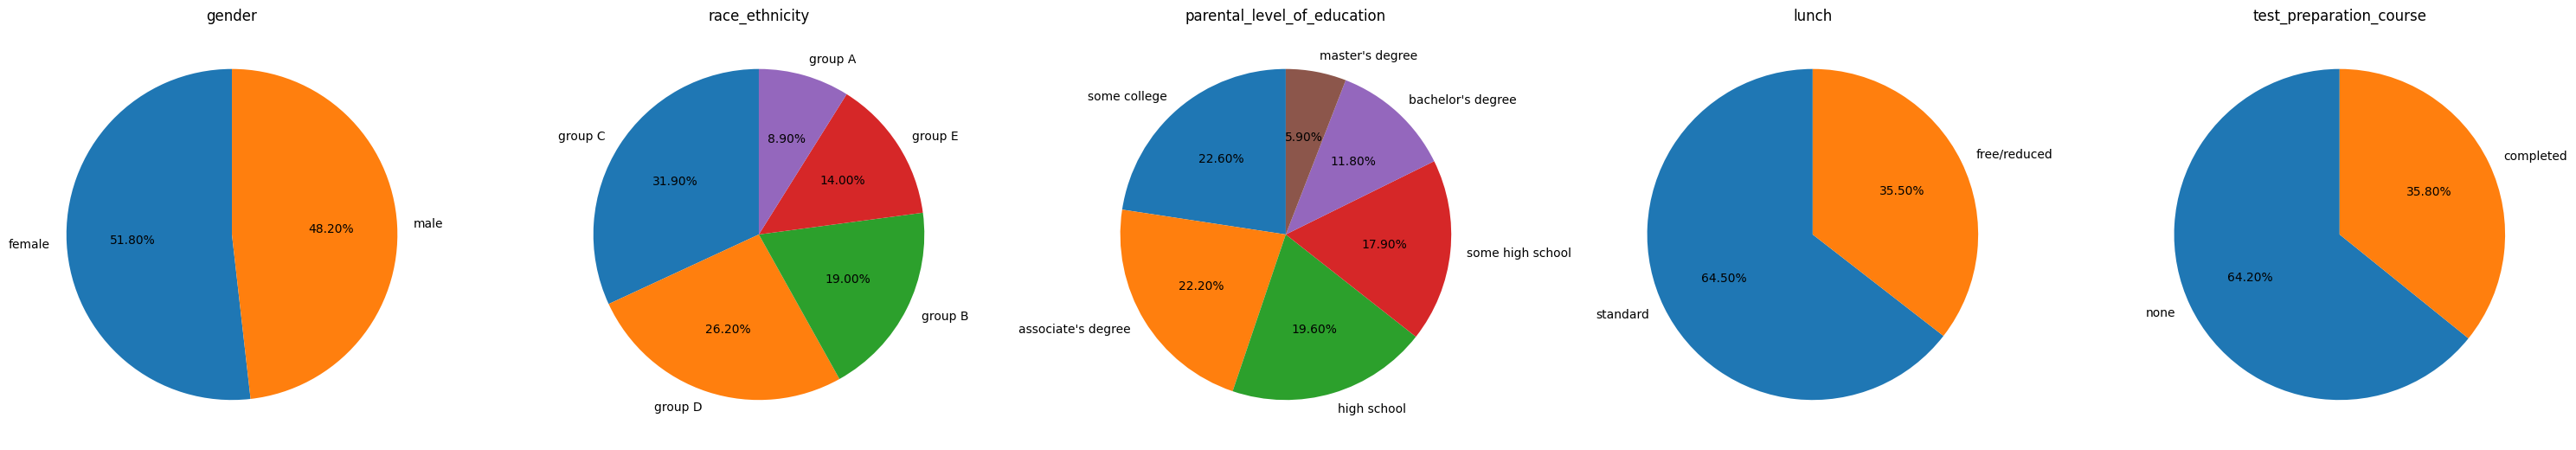

In [24]:
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(30, 12))

for i, col in enumerate(categorical_columns):
    data = df[col].value_counts()

    axes[i].pie(data.values, labels=data.index, autopct='%.2f%%', startangle=90)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Observations:
1. The  number of males and females is comparable.
2. Group A has the least representation and Group C followed by Group D has the most.
3. People with standard lunch before test are more in number.
4. People with complete test preparation are less.
5. Any one parental level of education does not dominate but "some college" and "associate's degree" has slightly higher numbers.

## 4.9 Gender Comparison for each subject

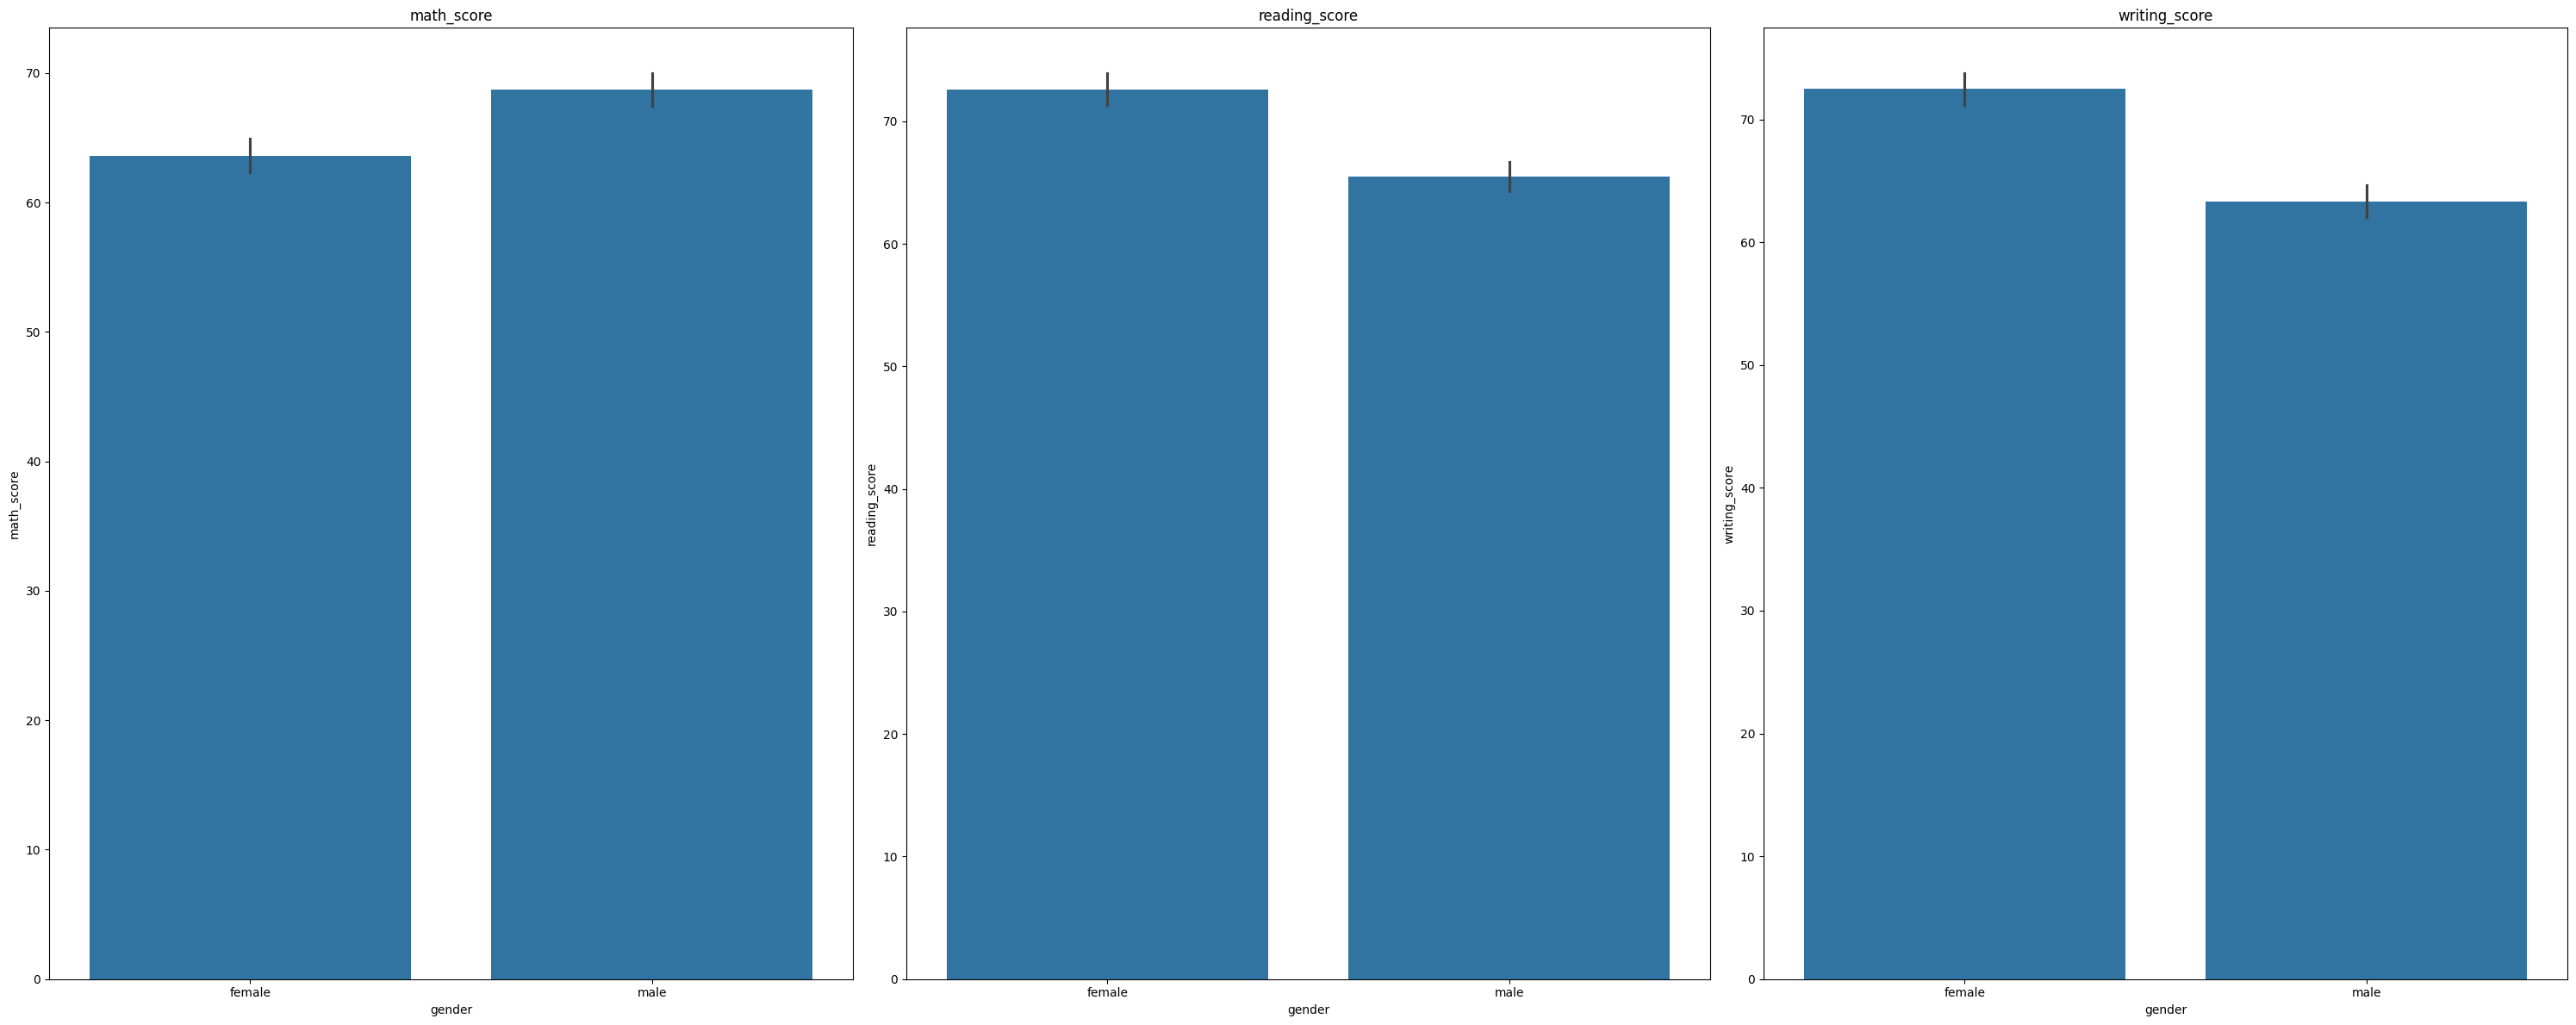

In [33]:
    fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

    for i,col in enumerate(numerical_columns):
        sns.barplot(data=df,x='gender',y=col,ax=axes[i],estimator='mean')
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

### Observations:
1. On average,females have performed better in reading and writing tests.
2. On average, males have performed better in math test.

## 4.10 Race/Ethnicity comparison for each subject

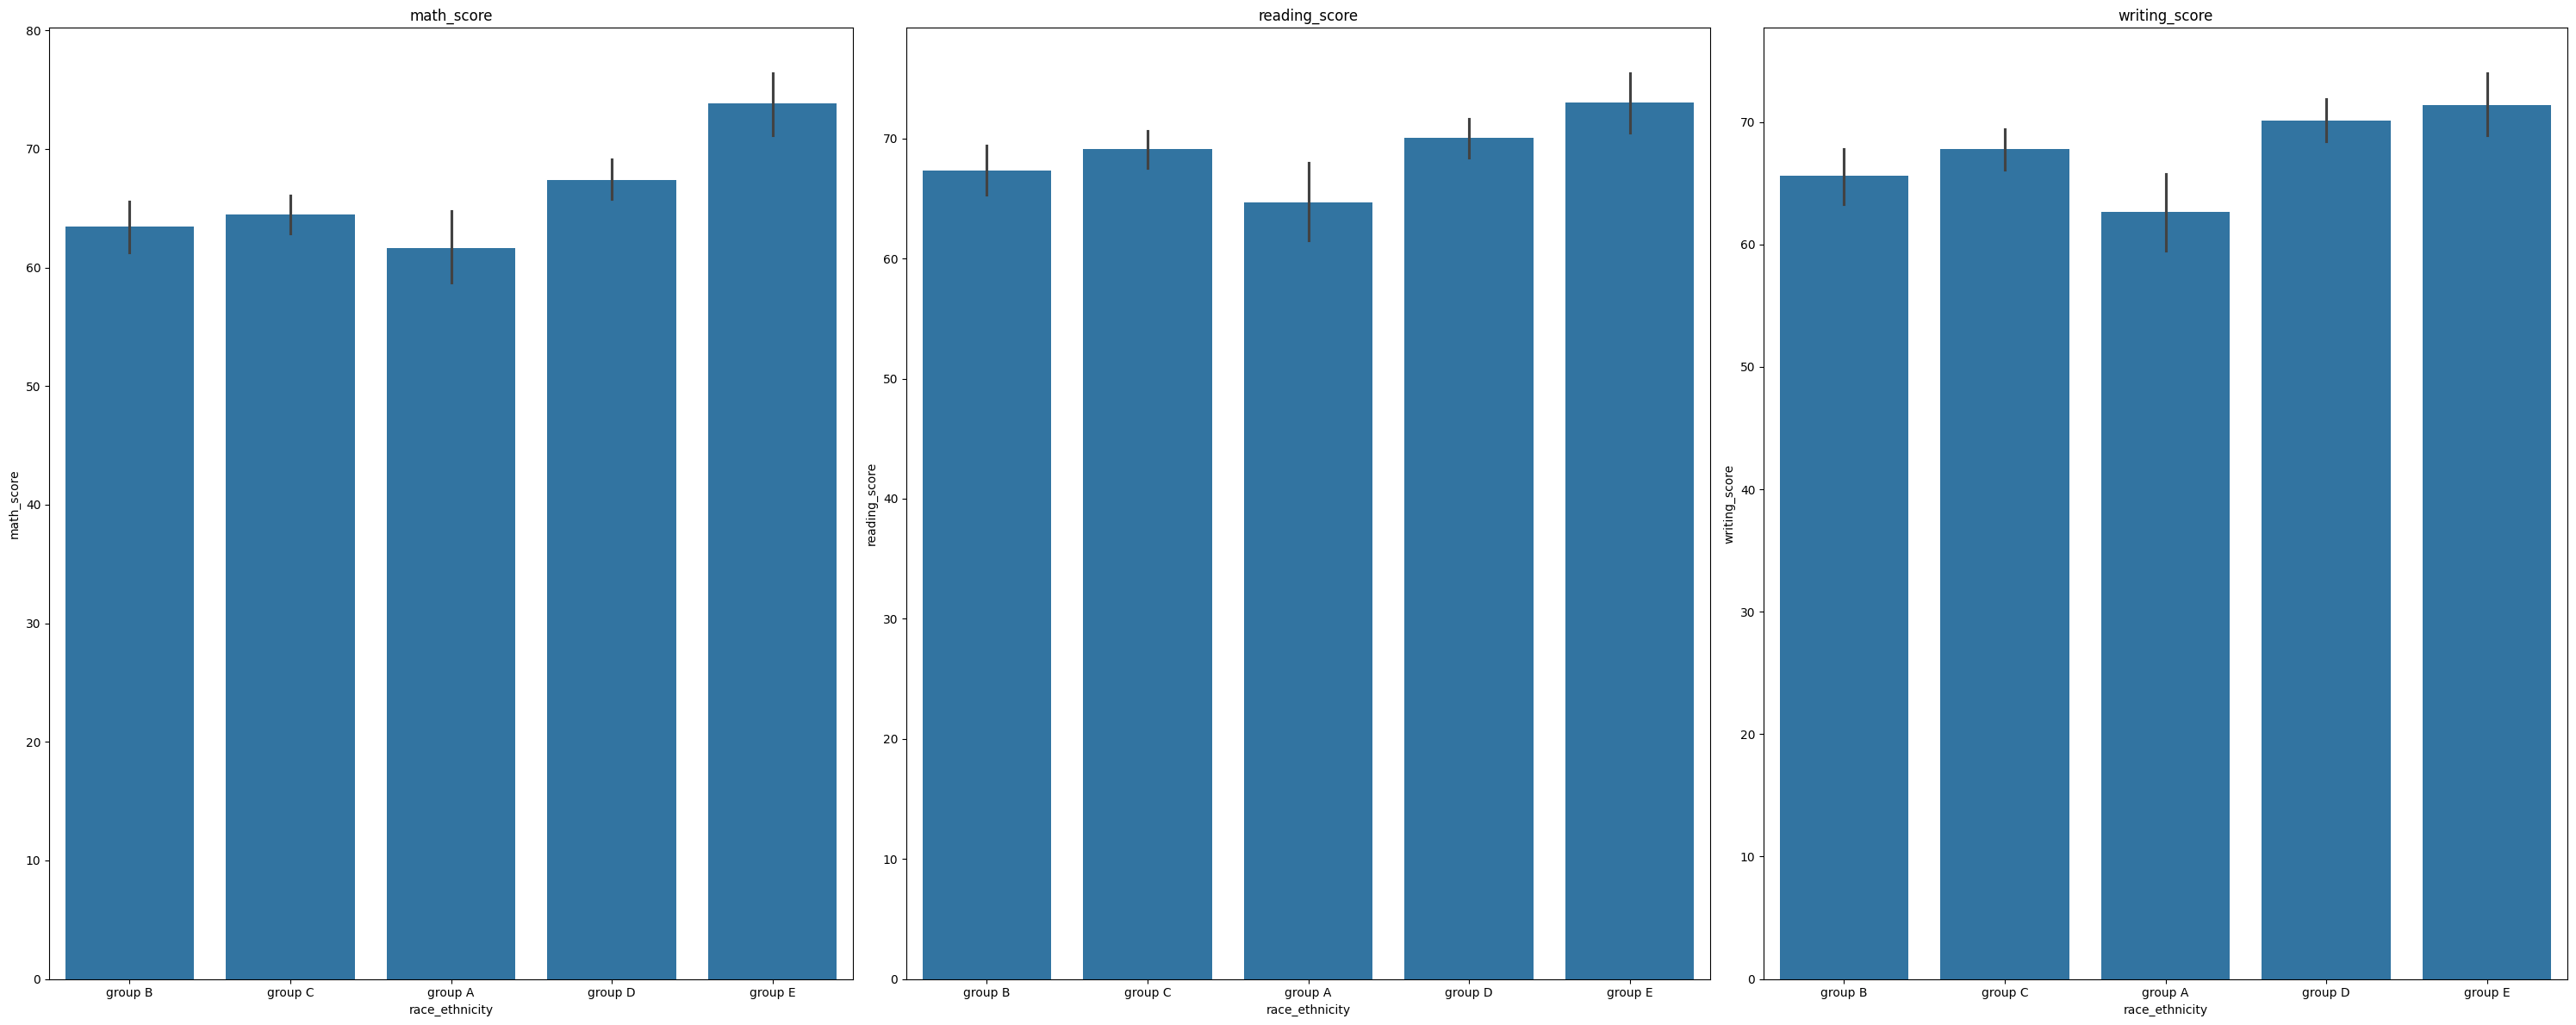

In [39]:
    fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

    for i,col in enumerate(numerical_columns):
        sns.barplot(data=df,x='race_ethnicity',y=col,ax=axes[i],estimator='mean')
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()


### Observations:
1. In every subject,Group E has highest marks on average.
2. In every subject, Group A has lowest marks on average.

## 4.11 Parental Level of Education comparison for each subject

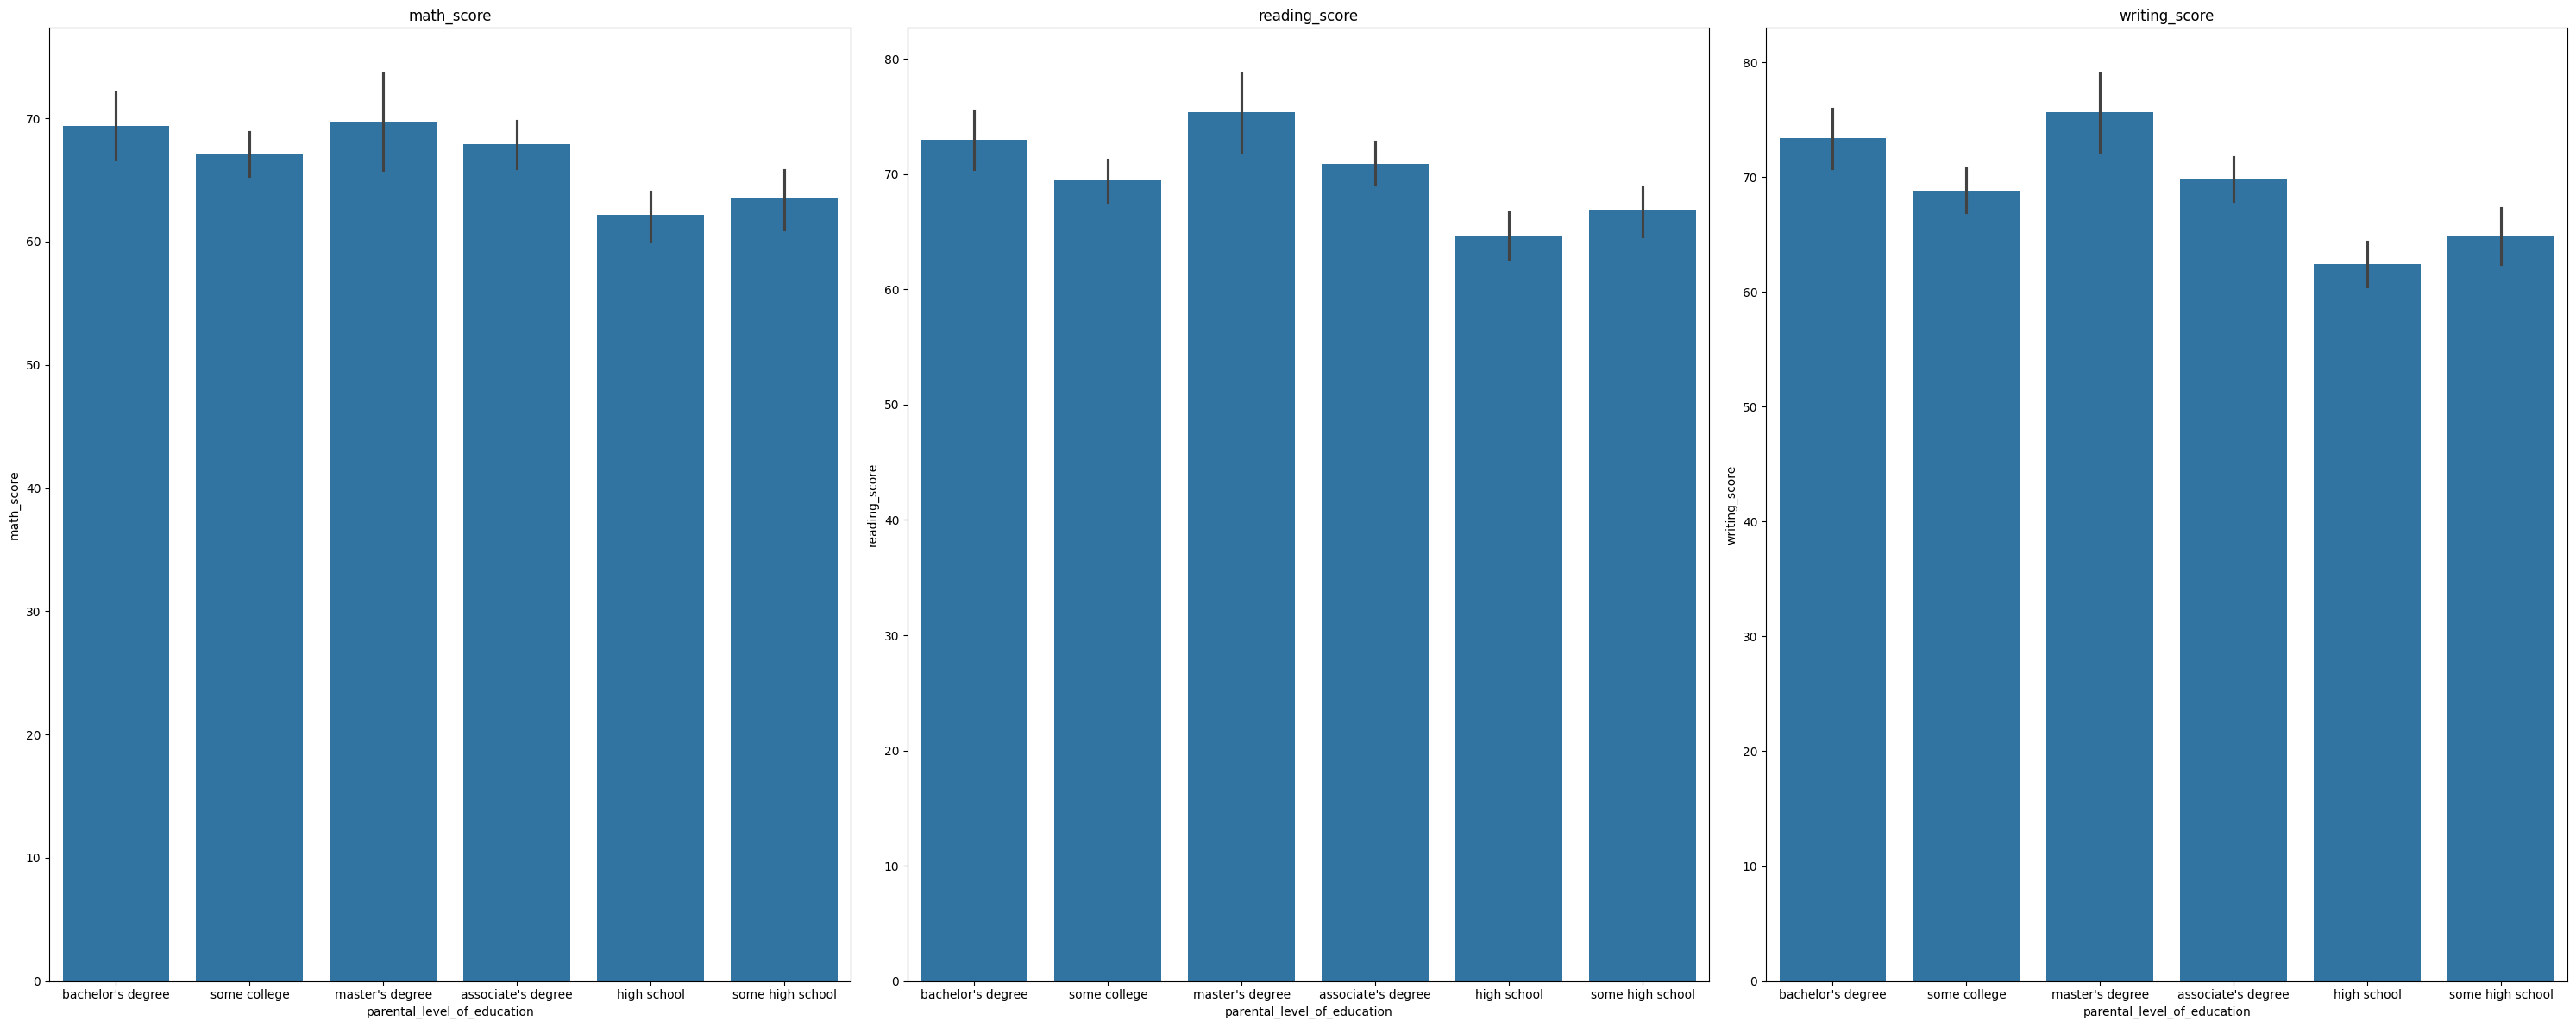

In [42]:
    fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

    for i,col in enumerate(numerical_columns):
        sns.barplot(data=df,x='parental_level_of_education',y=col,ax=axes[i],estimator='mean')
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()


### Observations:
On average, master's degree is most helpful in getting higher score and high school is the least helpful for every subject

## 4.12 Multivariate Analysis with Heatmap

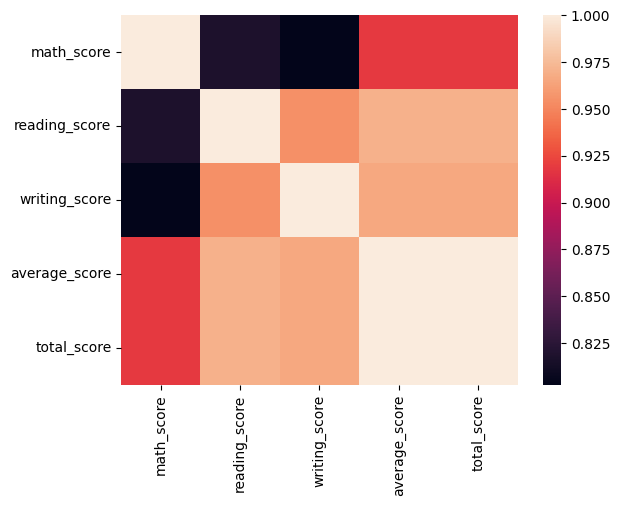

In [51]:
numeric_df=df[numerical_columns]
sns.heatmap(numeric_df.corr())
plt.show()

### Observations:
All types of scores have strong correlation with each other.

## Overall Conclusions:

1. Student's performance is affected by gender,race,parental level of education,lunch before test and test preparation course.
2. Females are better performers overall but in math test males are better.
3. Group E has the highest chance of performing well in each subject.
4. Master's degree is beneficial for better performance in each subject.
5. It is better to have standard lunch and to complete the test preparation course in order to perform well in the test. 